In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
crimes = pd.read_csv('data/crime.csv')
crimes['REF_DATE'].unique()

array([2017, 2018, 2019, 2020, 2021])

In [109]:
crimes = pd.read_csv('data/crime.csv')
crimes = crimes.loc[crimes['REF_DATE'] != 2021]
crimes = crimes[['GEO', 'VALUE']]
crimes = crimes.groupby(['GEO'])['VALUE'].sum().reset_index()
crimes['GEO'] = crimes['GEO'].str.replace('\s*\[\d+\]', '', regex=True)
crimes = crimes.loc[crimes['GEO'] != 'Canadian Forces Military Police']
crimes = crimes.rename(columns={'VALUE': 'Crimes', 'GEO': 'Province'})

# Combine territories into one to match other datasets
territories = ['Northwest Territories', 'Nunavut', 'Yukon']
total_territories_crimes = crimes[crimes['Province'].isin(territories)]['Crimes'].sum()
new_row = pd.DataFrame({'Province': ['Territories'], 'Crimes': [total_territories_crimes]})
crimes = pd.concat([crimes, new_row], ignore_index=True)
crimes = crimes[~crimes['Province'].isin(territories)]

education = pd.read_csv('data/education.csv')
education = education[['GEO', 'VALUE']]
education = education.loc[education['GEO'] != 'Canada']
education = education.rename(columns={'VALUE': 'Postsecondary Registrations', 'GEO': 'Province'})

merged_df = education.merge(crimes, on='Province', how='inner')

merged_df

,Province,Postsecondary Registrations,Crimes
0,Newfoundland and Labrador,26181,89254.57
1,Prince Edward Island,8616,28301.50
2,Nova Scotia,56841,144480.22
3,New Brunswick,27099,130174.15
4,Quebec,539385,870411.20
5,Ontario,903780,1518976.57
6,Manitoba,63363,339817.67
7,Saskatchewan,53085,411182.84
8,Alberta,203523,896610.19
9,British Columbia,287523,818413.64


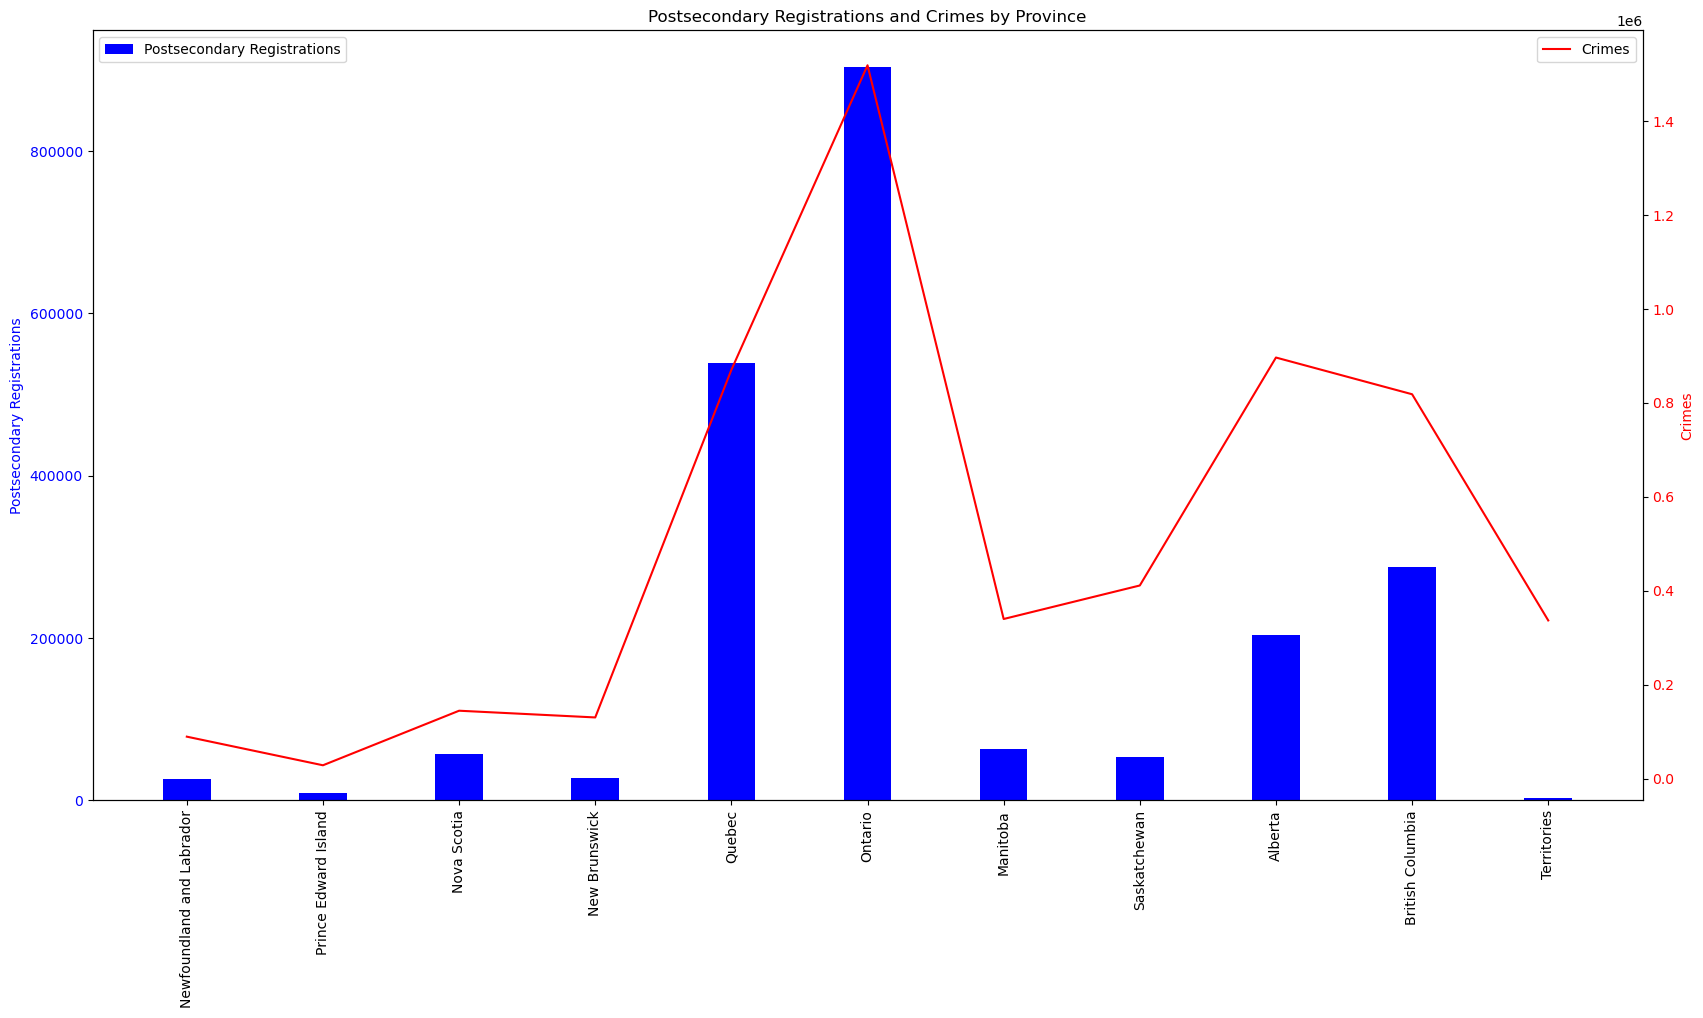

In [106]:
fig, ax1 = plt.subplots(figsize=(20,10))
N = len(merged_df)
ind = np.arange(N)
width = 0.35 
bars = ax1.bar(ind, merged_df['Postsecondary Registrations'], width, label='Postsecondary Registrations', color='b')
ax1.set_ylabel('Postsecondary Registrations', color='b')

for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(ind, merged_df['Crimes'], label='Crimes', color='r')
ax2.set_ylabel('Crimes', color='r')

for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.title('Postsecondary Registrations and Crimes by Province')
ax1.set_xticks(ind)
ax1.set_xticklabels(merged_df['Province'], rotation='vertical')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
